# <h1> Pre-procesamiento de imágenes </h1>

## Pasos a seguir:

1. Abrir la imágen con ayuda de openCV
2. Buscar los histogramas de cada canal en la imagen (R,G,B, Escala de grises)
3. Aplicarle un filtro gausiano (GaussianBlur) a la imagen
4. 
10. Aplicar una busqueda de umbral con un threshold binario    

# Bibliotecas a utilizar
- os (Para guardar, abrir, y moverse por el sistema de archivos)
- cv2   (Para el manejo y manipulación de imágenes)
- numpy (Para el manejo de pixeles)
- random    (Para debuggear y tener una seleccion aleatoria de imágenes)
- matplotlib    (Para el manejo de las impresiones de imágenes)

In [1]:
import os
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt

%matplotlib inline

# Dirección principal
dir = "c:/Users/jose_/Desktop/Tesis/Programa"
# Direccion de guardado de imágenes
outDir = os.getcwd()+"\Imagenes"
# Direccion de carga de videos
inDir = os.getcwd()+"\Videos"
#Dirección de guardado de cada canal
outChan = os.getcwd()+"\Canales2"
#Dirección de guardado de los histogramas de cada canal
outHist = os.getcwd()+"\Histogramas2"


In [2]:
# Variables globales que contendran las imagenes y sus nombres
global imgs 
global file_names

imgs = list()
file_names = list()

### Método "getImages"
#### Obtiene las imágenes de la carpeta en el directorio Imagenes

- Entrada: No recibe nada
- Salida: Ninguna, todo se guarda en las variables globales (imgs, file_names)

In [3]:
def getImages(dir):
    # Obtenemos el nombre de todos los archivos que se encuentran en la carpeta Imagenes
    files = os.listdir(dir)                 

    # Creamos un bucle para cada elemento dentro de la carpeta    
    for file in files:
        # Creamos la variable de la direccion de cada imagen
        image_path = dir + "/" + file           
       
        # Leemos la imagen
        image = cv2.imread(image_path)   
       
        # Si por alguna cuestion no se puede leer la imagen o el archivo no es una imagen se descarta en automatico
        if image is None:                          
            continue

        # Agregamos la imagen leida a la lista de imagenes
        imgs.append(image)                        
        # Agregamos el nombre de la imagen leida a la lista de nombres
        file_names.append(file)

# llamamos el metodo para obtener las imagenes
getImages(outDir)

# Imprimimos el tamaño de la lista de imagenes para comprobar que si se leyo correctamente
print(len(file_names))
print(len(imgs))

124
124


### Iniciamos el procesamiento de las imágenes

Parámetros:
- Entrada: Una lista de fotos a color (imgs)

______________________________________________________________________


### Realizaremos una búsqueda de histogramas de cada canal (B,G,R y Escala de Grises)
- Para esto, obtenemos los histogramas y los guardamos en la carpeta Histogramas

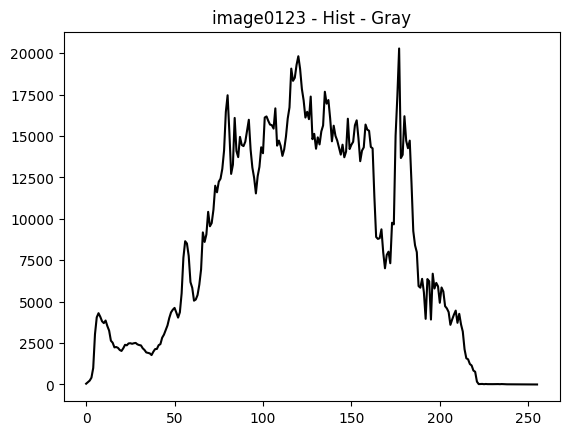

In [21]:
# Nos movemos al directorio donde se guardaran los histogramas
os.chdir(outHist)

# Recorremos la lista de imagenes 
for j, image in enumerate(imgs):

    # Definimos los colores representativos de cada canal (blue, green, red)
    colors = ('b','g','r')

    # Creamos una lista que por cada imagen guardara los histogramas de los canales 
    hist = list()

    # Obtenemos el nombre de la imagen (como se ubica en el directorio de archivos)
    fname = os.path.splitext(file_names[j])[0]

    # Obtenemos los histogramas de cada canal B,G,R
    for i,color in enumerate(colors):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))

    # Recorremos cada histograma encontrado en la imagen, le asignamos nombre y lo guardamos en la carpeta
    for i,h in enumerate(hist):
        plt.clf()
        plt.plot(h, colors[i])
        plt.title(fname + " - " + "Hist -" + colors[i].upper())
        plt.savefig(fname + " - " + colors[i].upper() + '.jpg')
    
    # Para obtener el histograma en escala de grises

    # Pasamos la imagen a escala de grises
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Obtenemos su histograma
    gray = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Le asignamos un nombre al histograma y lo guardamos en la carpeta
    plt.clf()
    plt.plot(gray, 'k')
    plt.title(fname + " - " + "Hist - Gray")
    plt.savefig(fname + " - Gray.jpg")

# Nos regresamos al directorio raiz del programa
os.chdir(dir)

Ahora procedemos a separar las imagenes en cada canal y guardarlas en una lista distinta cada una

In [4]:
# Creamos una lista por cada canal que utilizaremos, en este caso
# azul, verde, rojo y escala de grises
blueC = list()
greenC = list()
redC = list()
grayC = list()

# Recorremos la lista de imagenes para ir separando cada imagen en sus canales
for img in imgs:

    # Separamos la imagen en sus 3 canales azul, verde y rojo
    bI, gI, rI = cv2.split(img)
    # Convertimos la imagen a escala de grises
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Agregamos la imagen resultante de cada canal a su respectiva lista
    blueC.append(bI)
    greenC.append(gI)
    redC.append(rI) 
    grayC.append(grayImage)


# Pruebas de funcionalidad
------------------------------------------------------------------------------

### 1. Primera prueba: Aplicamos un filtro gaussiano y despues una busqueda de umbral 
#### (Esto utilizando las imagenes en su canal azul)

In [5]:
thr = list()
for img in blueC:

    dst = cv2.GaussianBlur(img, (11,11), cv2.BORDER_DEFAULT)

    _, thresh = cv2.threshold(dst, 80, 255, cv2.THRESH_BINARY)
    thr.append(thresh)
    cv2.imshow("Original", cv2.resize(img, (528,528)))
    cv2.imshow("Image", cv2.resize(thresh, (528,528)))
    cv2.waitKey(200)
cv2.destroyAllWindows()

### 2. Segunda prueba: Hacemos una busqueda de lineas rectas con el fin de proceder a recortar las imagenes y evitar ruido 
#### Los pasos que se siguieron fueron:
    1.1. Convertir la imagen a escala de grises
    1.2. Hacer una busqueda de bordes con los valores 50 y 150 como minimo y maximo (es decir, fuera de estos valores será considerado un borde)
    1.3. Realizar la busqueda de lineas rectas en los bordes resultantes, en donde 300 pixeles seguidos serán considerados linea recta
    1.4. Busqueda de las lineas mas interna, mas externa y dibujar un rectangulo entre estas lineas  

In [11]:
j = 0
crpImg = list()
for i in imgs:
    img = i.copy()
    cropped = i.copy()
    heigh = i.shape[1] - 500
    weigh = i.shape[0]
    maxWeigh = ((weigh/2)+(weigh/4))

    # Cambio de imagen en color a imagen a escala de grises 
    imagen_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Canny es el detector de bordes
    # Imagen_ grises        Es la imagen fuente a utilizar en escala de grises
    # 50                    Valor de umbral minimo, a partir del cual se considera algo un borde
    # 150                   Valor de umbral maximo, a partir del cual se considera algo un borde
    # ApertureSize          El ancho de la linea de bordes que se deja en la imagen
    bordes = cv2.Canny(imagen_grises, 50, 150, apertureSize=3)

    # Detector de lineas
    # Bordes es la imagen resultante de aplicar Canny 
    # 1 es el radio de resolución, es decir, los saltos entre pixeles
    # pi/180 Angulo de busqueda, normalmente lleva el valor de 1 grado pero representado en coordenadas polares
    # 300 Threshld, pero no es un valor de umbral, se refiere mas bien a la cantidad de puntos minimos para considerar algo una linea 
    lineas = cv2.HoughLines(bordes, 1, np.pi/180, 300)


    # i = 0
    min = 10000
    max = 0
    for linea in lineas:
        # colors = [(255,0,0), (0,255,0), (0,0,255)]
        rho, theta = linea[0]
        # print(rho)
        
        #Conversion a cartesianas
        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho

        # 
        x1 = int(x0 + 1500 * (-b))
        x2 = int (x0 - 1500 * (-b))
        y1 = int(y0 + 1500 * a)
        y2 = int(y0 - 1500 * a)

        if x1 == x2:
            if x1 < min:
                min = x1
            if x1 > max:
                max = x1
            # cv2.line(img, (x1,y1),(x2,y2), colors[i%3], 3)
            i = i + 1

    if(max > maxWeigh):
        # print("\t\tENTRO !!!!!!")
        # print("Min Point => (%d, - %d)" % (min, heigh))
        # print("Max Point => (%d, %d)" % (max, heigh))
        cv2.rectangle(img, (min, - heigh) , (max, heigh), (255,0,0), 10)
        # cropped = img[1: i.shape[1], min:max]
        crpImg.append(img[1: i.shape[1], min: max])
        j = j + 1

    # cv2.imshow("Imagen Lineas", cv2.resize(img,(512,512)))
    cv2.imshow("Cropped", cv2.resize(cropped,(512,512)))
    cv2.waitKey(100)

print("Se encontraron un total de %d Rectangulos servibles" %j)
cv2.destroyAllWindows()



Se encontraron un total de 36 Rectangulos servibles


### Mostramos las imagenes resultantes despues de cortarlas

In [14]:
for i in crpImg:
    cv2.imshow("Image", cv2.resize(i,(512,512)))
    cv2.waitKey(300)
cv2.destroyAllWindows()